# Spectral statistics

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from wavespectra import read_ww3

datadir = Path("../data")

dset = read_ww3(datadir / "ww3file.nc").load()
dset

<xarray.Dataset> Size: 44kB
Dimensions:  (time: 9, site: 2, freq: 25, dir: 24)
Coordinates:
  * freq     (freq) float32 100B 0.04118 0.0453 0.04983 ... 0.3352 0.3687 0.4056
  * site     (site) int32 8B 1 2
  * time     (time) datetime64[ns] 72B 2014-12-01 ... 2014-12-05
  * dir      (dir) float32 96B 270.0 255.0 240.0 225.0 ... 315.0 300.0 285.0
Data variables:
    dpt      (time, site) float32 72B 106.6 818.7 106.6 ... 818.7 106.6 818.7
    efth     (time, site, freq, dir) float32 43kB 5.596e-17 ... 9.287e-06
    lat      (site) float32 8B 19.95 19.8
    lon      (site) float32 8B 92.1 92.0
    wspd     (time, site) float32 72B 5.1 5.478 6.149 5.787 ... 4.2 3.27 2.89
    wdir     (time, site) float32 72B 24.92 21.98 331.1 ... 341.8 30.44 25.41

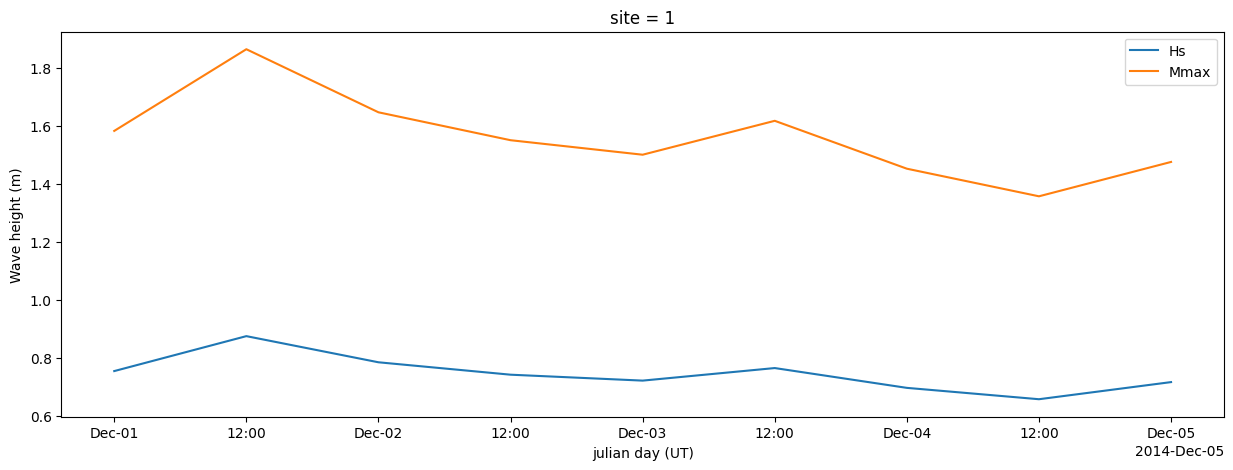

In [2]:
# Wave height

hs = dset.spec.hs()
hmax = dset.spec.hmax()

fig = plt.figure(figsize=(15, 5))
hs.isel(site=0).plot(label="Hs")
hmax.isel(site=0).plot(label="Mmax")
plt.ylabel("Wave height (m)")
plt.legend();

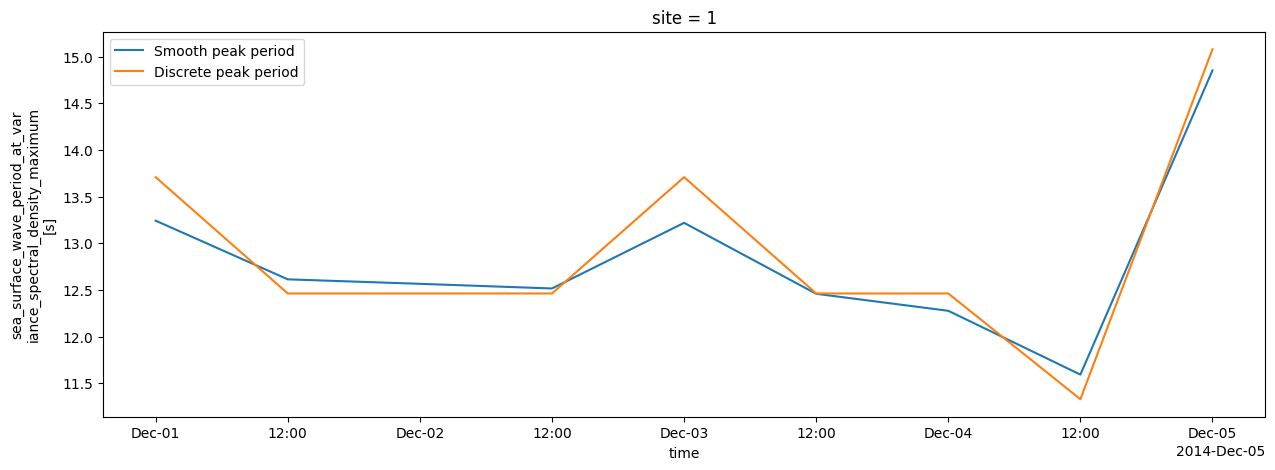

In [3]:
# Peak wave period
# Smooth (parabolic fit) vs discrete (frequency at the 1D peak)

tp_smooth = dset.spec.tp()
tp_discrete = dset.spec.tp(smooth=False)

fig = plt.figure(figsize=(15, 5))
tp_smooth.isel(site=0).plot(label="Smooth peak period")
tp_discrete.isel(site=0).plot(label="Discrete peak period")
plt.legend();

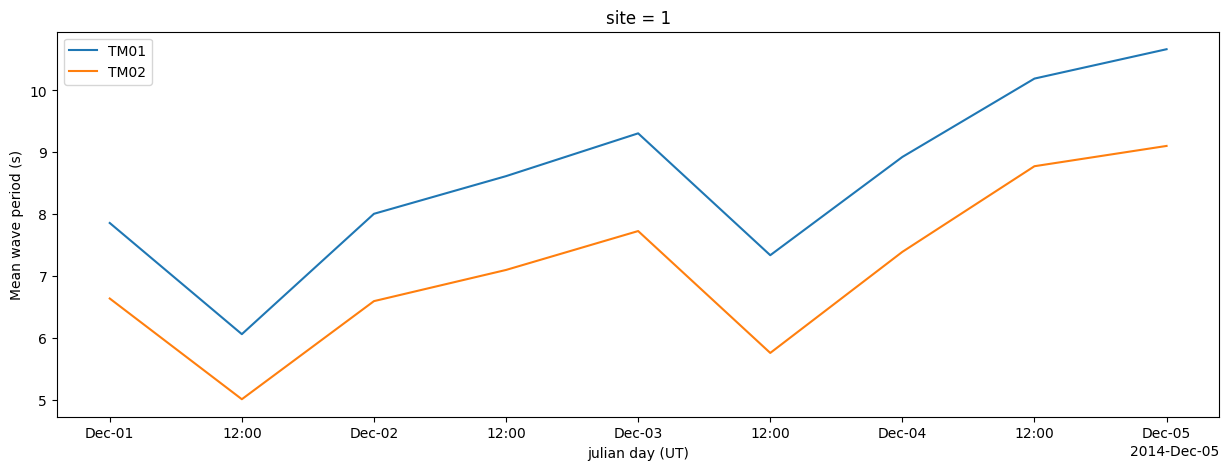

In [4]:
# Periods from the first and second moments

tm01 = dset.spec.tm01()
tm02 = dset.spec.tm02()

fig = plt.figure(figsize=(15, 5))
tm01.isel(site=0).plot(label="TM01")
tm02.isel(site=0).plot(label="TM02")
plt.ylabel("Mean wave period (s)")
plt.legend();

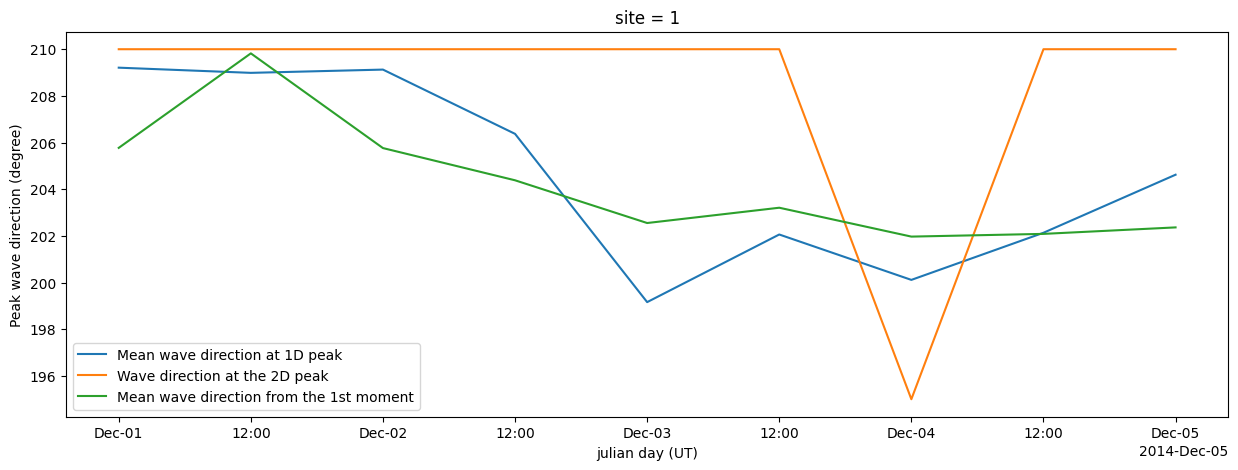

In [5]:
# Wave direction

dpm = dset.spec.dpm()
dp = dset.spec.dp()
dm = dset.spec.dm()

fig = plt.figure(figsize=(15, 5))
dpm.isel(site=0).plot(label="Mean wave direction at 1D peak")
dp.isel(site=0).plot(label="Wave direction at the 2D peak")
dm.isel(site=0).plot(label="Mean wave direction from the 1st moment")
plt.ylabel("Peak wave direction (degree)")
plt.legend();

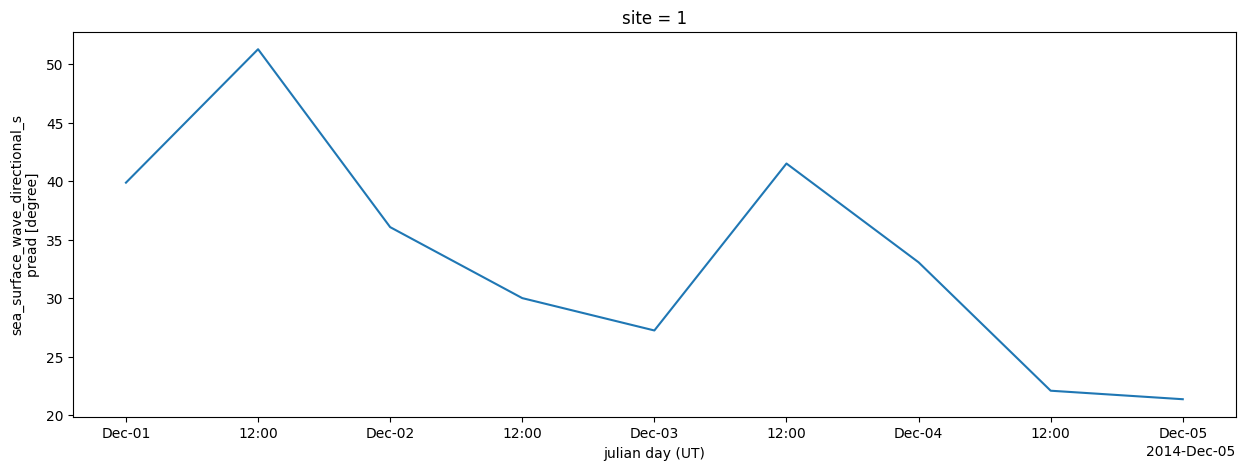

In [6]:
# Directional spreading

dspr = dset.spec.dspr()

dspr.isel(site=0).plot(figsize=(15, 5));

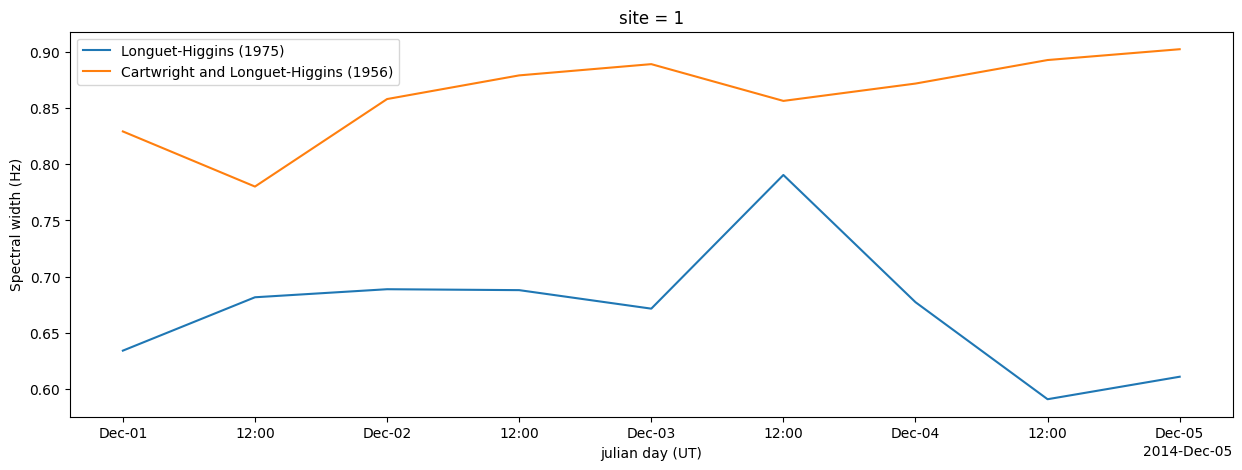

In [7]:
# Spectral width

sw_lh75 = dset.spec.sw()
sw_cl56 = dset.spec.swe()

fig = plt.figure(figsize=(15, 5))
sw_lh75.isel(site=0).plot(label="Longuet-Higgins (1975)")
sw_cl56.isel(site=0).plot(label="Cartwright and Longuet-Higgins (1956)")
plt.ylabel("Spectral width (Hz)")
plt.legend();

In [8]:
# Different stats simultaneously

stats = [
    "hs",
    "hmax",
    "tp",
    "tm01",
    "tm02",
    "dp",
    "dpm",
    "dm",
    "dspr",
    "sw",
    "swe",
]
ds = dset.spec.stats(stats)
ds

<xarray.Dataset> Size: 944B
Dimensions:  (site: 2, time: 9)
Coordinates:
  * site     (site) int32 8B 1 2
  * time     (time) datetime64[ns] 72B 2014-12-01 ... 2014-12-05
Data variables:
    hs       (time, site) float32 72B 0.7552 0.8013 0.8756 ... 0.7173 0.7955
    hmax     (time, site) float64 144B 1.583 1.684 1.864 ... 1.402 1.476 1.661
    tp       (time, site) float32 72B dask.array<chunksize=(9, 2), meta=np.ndarray>
    tm01     (time, site) float32 72B 7.856 7.503 6.058 ... 10.64 10.67 8.983
    tm02     (time, site) float32 72B 6.635 6.297 5.006 ... 9.397 9.102 7.067
    dp       (time, site) float32 72B dask.array<chunksize=(9, 2), meta=np.ndarray>
    dpm      (time, site) float32 72B dask.array<chunksize=(9, 2), meta=np.ndarray>
    dm       (time, site) float32 72B 205.8 206.0 209.8 ... 201.8 202.4 202.5
    dspr     (time, site) float32 72B 39.88 45.12 51.29 ... 19.54 21.37 35.59
    sw       (time, site) float32 72B 0.6341 0.6478 0.6816 ... 0.6109 0.7846
    swe      (time, site) float32 72B 0.8292 0.8192 0.7802 ... 0.9024 0.8894
Attributes:
    standard_name:  sea_surface_wave_significant_height
    units:          m

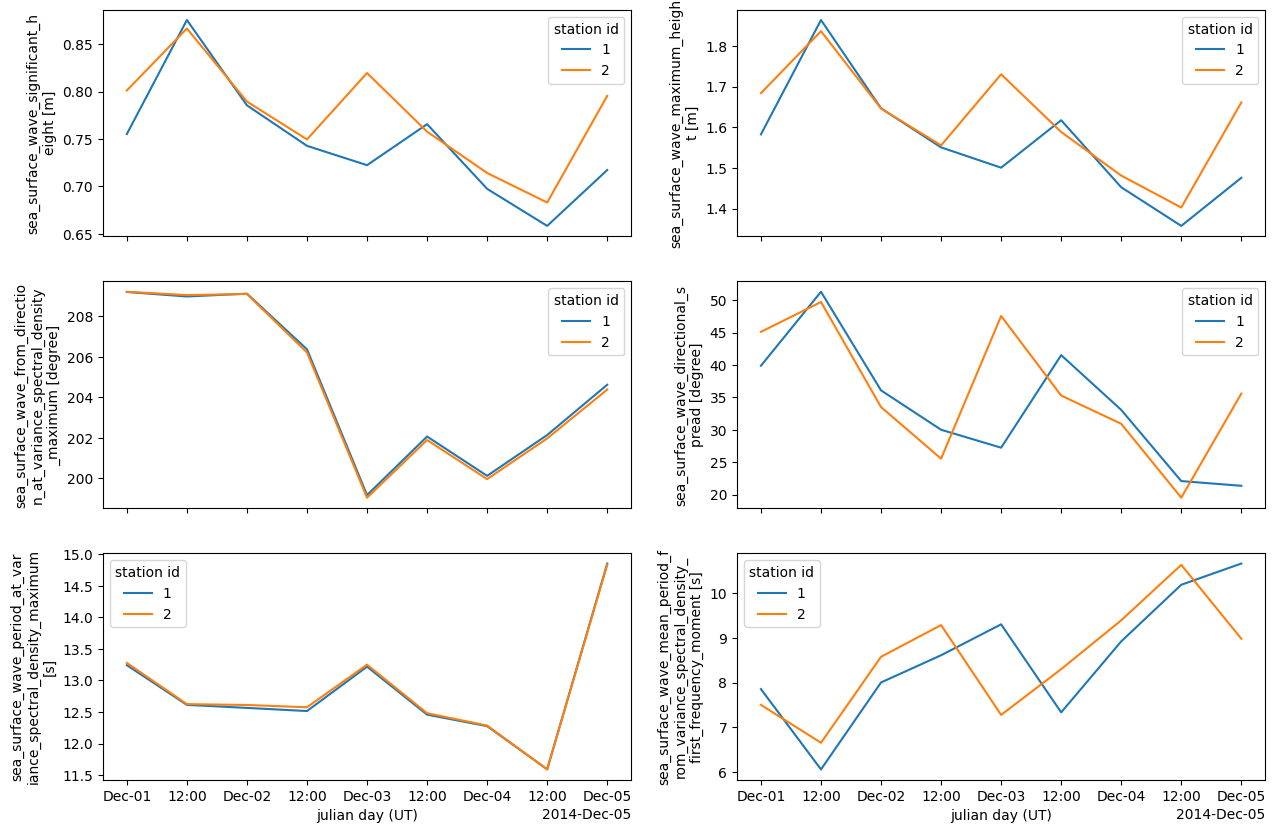

In [9]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 10))

ds.hs.plot.line(ax=ax1, x="time");
ds.hmax.plot.line(ax=ax2, x="time");
ds.dpm.plot.line(ax=ax3, x="time");
ds.dspr.plot.line(ax=ax4, x="time");
ds.tp.plot.line(ax=ax5, x="time");
ds.tm01.plot.line(ax=ax6, x="time");
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticklabels([])
    ax.set_xlabel("")

In [10]:
ds.to_netcdf("stats_from_spectra.nc")

!ncdump -h stats_from_spectra.nc

netcdf stats_from_spectra {
dimensions:
	site = 2 ;
	time = 9 ;
variables:
	int site(site) ;
		site:long_name = "station id" ;
		site:axis = "X" ;
	double time(time) ;
		time:_FillValue = NaN ;
		time:long_name = "julian day (UT)" ;
		time:standard_name = "time" ;
		time:conventions = "Relative julian days with decimal part (as parts of the day)" ;
		time:axis = "T" ;
		time:units = "days since 1990-01-01T00:00:00+00:00" ;
		time:calendar = "proleptic_gregorian" ;
	float hs(time, site) ;
		hs:_FillValue = NaNf ;
		hs:standard_name = "sea_surface_wave_significant_height" ;
		hs:units = "m" ;
	double hmax(time, site) ;
		hmax:_FillValue = NaN ;
		hmax:standard_name = "sea_surface_wave_maximum_height" ;
		hmax:units = "m" ;
	float tp(time, site) ;
		tp:_FillValue = NaNf ;
		tp:standard_name = "sea_surface_wave_period_at_variance_spectral_density_maximum" ;
		tp:units = "s" ;
	float tm01(time, site) ;
		tm01:_FillValue = NaNf ;
		tm01:standard_name = "sea_surface_wave_mean_period_from_vari

## Miscellaneous

/tmp/ipykernel_3066289/3773776789.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  freqs = np.arange(dset.freq[0], dset.freq[-1], 0.005)


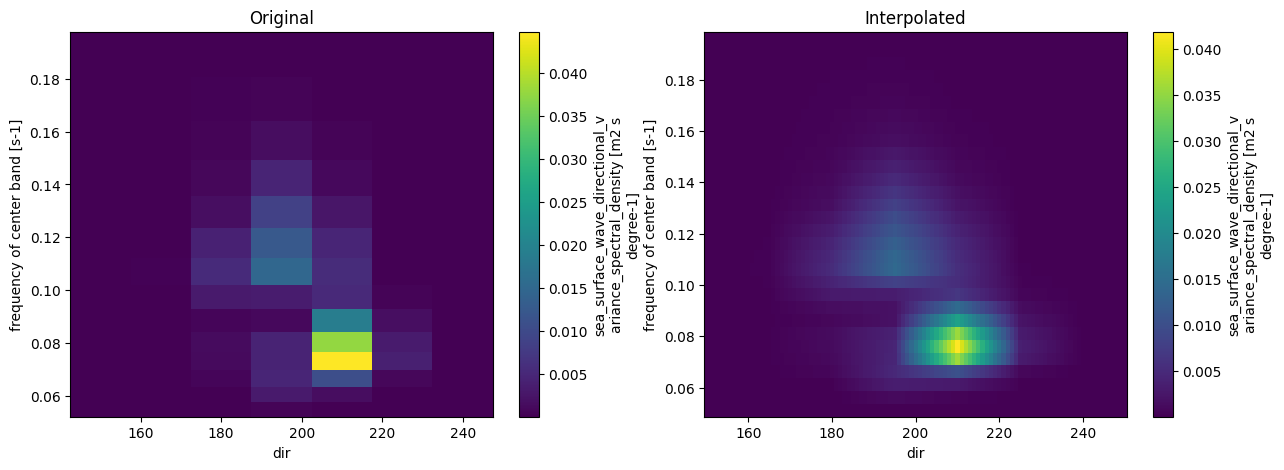

In [11]:
# Interpolate onto different spectral basis

freqs = np.arange(dset.freq[0], dset.freq[-1], 0.005)
dirs = np.arange(0, 361, 1)
darr_interp = dset.spec.interp(freq=freqs, dir=dirs)

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(121)
darr = dset.efth.sortby("dir")
darr.isel(time=0, site=0).sel(dir=slice(150, 250), freq=slice(0.05, 0.2)).plot()
plt.title("Original");

ax = fig.add_subplot(122)
darr = darr_interp.sortby("dir")
darr.isel(time=0, site=0).sel(dir=slice(150, 250), freq=slice(0.05, 0.2)).plot()
plt.title("Interpolated");

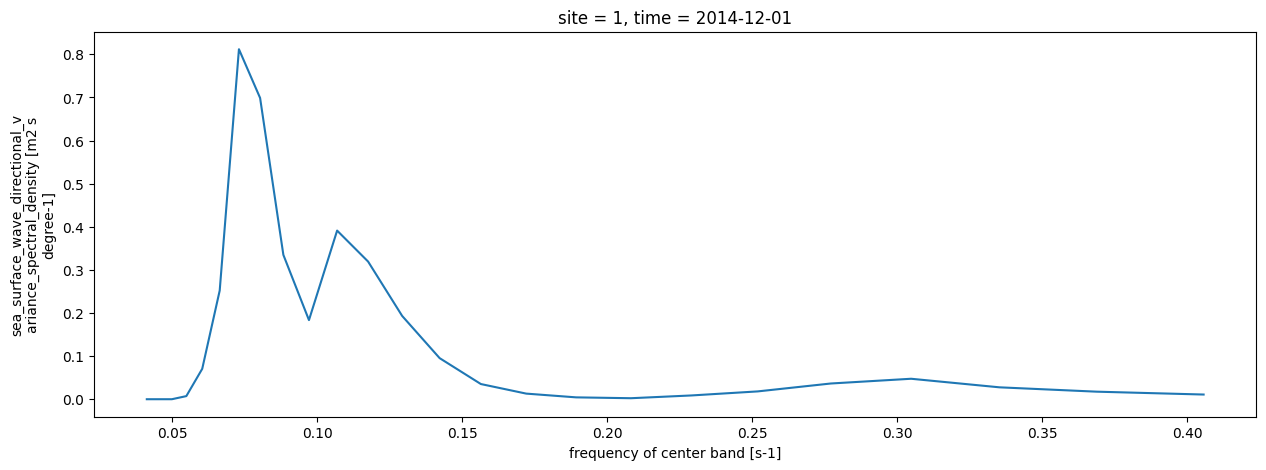

In [13]:
# Integrate over directions

ds = dset.isel(time=0, site=0).spec.oned()
ds
ds.plot(figsize=(15, 5));

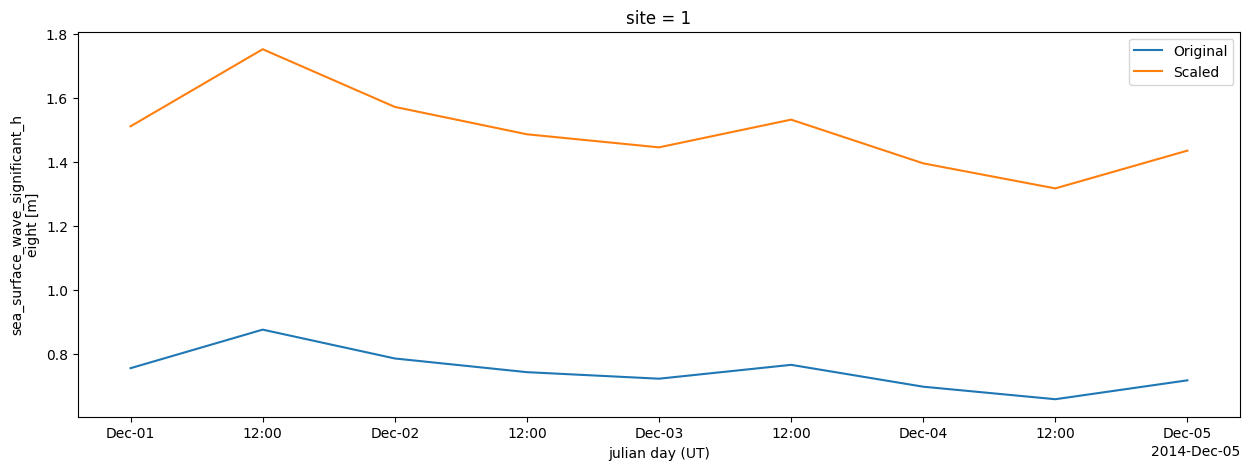

In [15]:
# Scale spectra with hs-based expression

dset_scaled = dset.spec.scale_by_hs(expr="2*hs")

fig = plt.figure(figsize=(15, 5))

dset.isel(site=0).spec.hs().plot(label="Original")
dset_scaled.isel(site=0).spec.hs().plot(label="Scaled")
plt.legend();

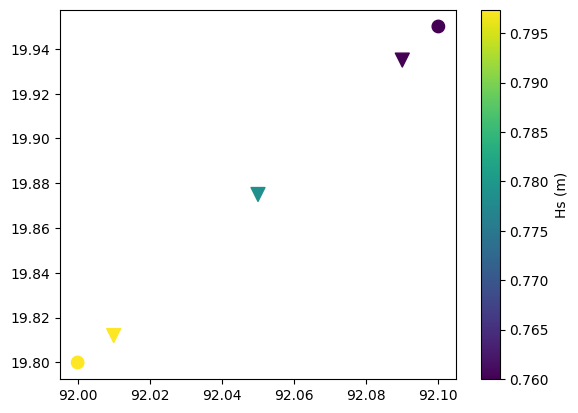

In [16]:
# Selecting and interpolating

idw = dset.spec.sel(
    lons=[92.01, 92.05, 92.09],
    lats=[19.812, 19.875, 19.935],
    method="idw"
)

p = plt.scatter(dset.lon, dset.lat, 80, dset.isel(time=0).spec.hs(), label="Dataset points")
p = plt.scatter(idw.lon, idw.lat, 100, idw.isel(time=0).spec.hs(), marker="v", label="Interpolated points")
plt.colorbar(p, label="Hs (m)");